In [1]:
import pandas as pd

In [2]:
fraud_df = pd.read_csv('creditcard.csv')

In [3]:
fraud_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
fraud_df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
print("\nData types:\n", fraud_df.dtypes.value_counts())


Data types:
 float64    30
int64       1
dtype: int64


In [6]:
class_counts=fraud_df['Class'].value_counts()

In [7]:
print("Number of frauds vs non-frauds:\n", class_counts)

Number of frauds vs non-frauds:
 0    284315
1       492
Name: Class, dtype: int64


In [8]:
print("\nFraud ratio:", round(class_counts[1] / class_counts.sum() * 100, 4), "%")


Fraud ratio: 0.1727 %


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

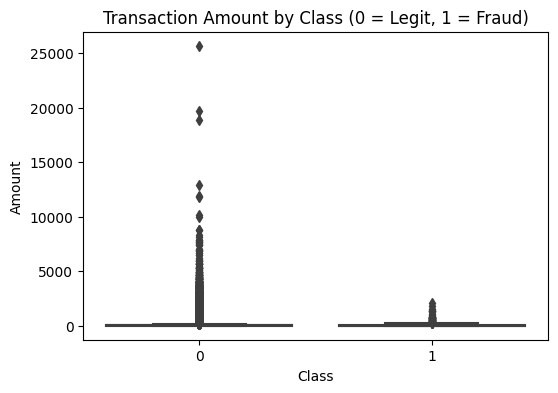

In [10]:
# 3. Distribution of Amount by Class
plt.figure(figsize=(6,4))
sns.boxplot(data=fraud_df, x="Class", y="Amount")
plt.title("Transaction Amount by Class (0 = Legit, 1 = Fraud)")
plt.show()

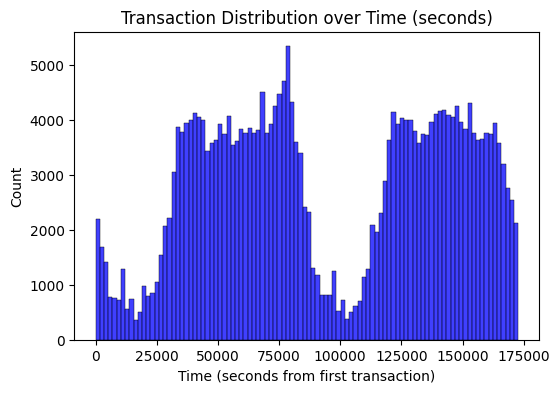

In [11]:
# 4. Distribution of Time
plt.figure(figsize=(6,4))
sns.histplot(fraud_df["Time"], bins=100, color="blue", kde=False)
plt.title("Transaction Distribution over Time (seconds)")
plt.xlabel("Time (seconds from first transaction)")
plt.show()

In [12]:
# 5. Quick check of correlations (Amount, Time vs target)
corr = fraud_df[["Time","Amount","Class"]].corr()
print("\nCorrelation with target:\n", corr["Class"])


Correlation with target:
 Time     -0.012323
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64


In [13]:
fraud_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Features (X) and Target (y)
X = fraud_df.drop("Class", axis=1)
y = fraud_df["Class"]

# 2. Train-test split (stratified to keep same fraud ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Fraud ratio in train: %", y_train.mean()*100)
print("Fraud ratio in test: %", y_test.mean()*100)

# 3. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled shape:", X_train_scaled.shape)


Train shape: (227845, 30) Test shape: (56962, 30)
Fraud ratio in train: % 0.17292457591783889
Fraud ratio in test: % 0.17204452090867595
X_train_scaled shape: (227845, 30)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 1. Train Logistic Regression with class weights to handle imbalance
log_reg = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# 2. Predictions
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:,1]  # probabilities for ROC-AUC

# 3. Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob))


Confusion Matrix:
 [[55479  1385]
 [    8    90]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9999    0.9756    0.9876     56864
           1     0.0610    0.9184    0.1144        98

    accuracy                         0.9755     56962
   macro avg     0.5304    0.9470    0.5510     56962
weighted avg     0.9982    0.9755    0.9861     56962


ROC-AUC Score: 0.9720881652464024


A. Plot Precision–Recall curve & compute Average Precision

Average Precision (AP): 0.718934567134695


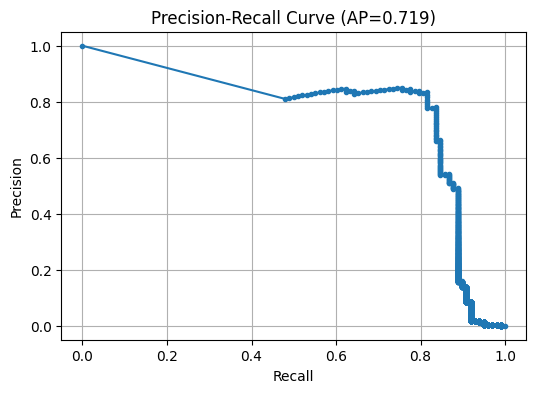

In [10]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
ap = average_precision_score(y_test, y_prob)
print("Average Precision (AP):", ap)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AP={ap:.3f})')
plt.grid(True)
plt.show()


In [11]:
import numpy as np

desired_recall = 0.90
# thresholds array length = len(precision)-1; recall array starts at 1.0 and goes down
idx = np.where(recall >= desired_recall)[0]
if idx.size:
    chosen_idx = idx[-1]  # pick the highest threshold that still achieves desired recall
    chosen_threshold = thresholds[chosen_idx]
    print("Threshold for recall >= {:.2f}: {:.4f}".format(desired_recall, chosen_threshold))
else:
    print("No threshold achieves that recall")


Threshold for recall >= 0.90: 0.7496


In [12]:
y_pred_thresh = (y_prob >= chosen_threshold).astype(int)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh, digits=4))


[[56324   540]
 [    9    89]]
              precision    recall  f1-score   support

           0     0.9998    0.9905    0.9952     56864
           1     0.1415    0.9082    0.2448        98

    accuracy                         0.9904     56962
   macro avg     0.5707    0.9493    0.6200     56962
weighted avg     0.9984    0.9904    0.9939     56962



Precision–Recall Curve & Threshold Selection

Average Precision (AP): 0.718934567134695


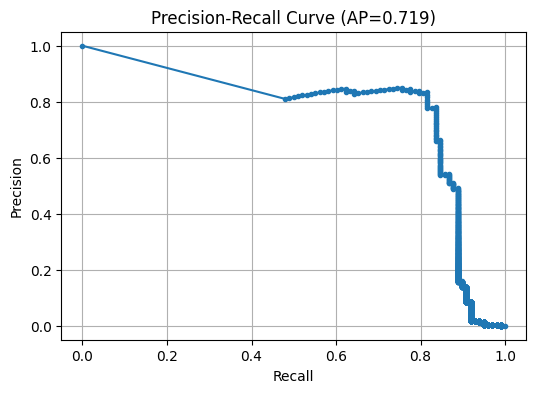

Threshold recall>=0.90: 0.7495945685371213
Threshold max F1: 0.9999999398473326
Threshold precision>=0.50: 1.0

Recall-focused @ threshold 0.7496
TP: 89 FP: 540 FN: 9 TN: 56324
Precision=0.141, Recall=0.908

Balanced (F1) @ threshold 1.0000
TP: 80 FP: 16 FN: 18 TN: 56848
Precision=0.833, Recall=0.816

Precision-focused @ threshold 1.0000
TP: 47 FP: 11 FN: 51 TN: 56853
Precision=0.810, Recall=0.480


In [13]:
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Compute precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
ap = average_precision_score(y_test, y_prob)
print("Average Precision (AP):", ap)

# Plot PR curve
plt.figure(figsize=(6,4))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AP={ap:.3f})')
plt.grid(True)
plt.show()

# --- Pick 3 operating points ---
# 1. Recall-focused (>= 0.90)
recall_target = 0.90
idx_recall = np.where(recall >= recall_target)[0][-1]
thresh_recall = thresholds[idx_recall]

# 2. Balanced (F1-score max)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
idx_f1 = np.argmax(f1_scores)
thresh_f1 = thresholds[idx_f1]

# 3. Precision-focused (>= 0.50 if possible)
precision_target = 0.50
idx_prec = np.where(precision >= precision_target)[0]
# Subtract 1 from idx_prec[-1] to match the thresholds array length
thresh_prec = thresholds[idx_prec[-1] - 1] if idx_prec.size and idx_prec[-1] > 0 else thresholds[0]

# Print thresholds
print("Threshold recall>=0.90:", thresh_recall)
print("Threshold max F1:", thresh_f1)
print("Threshold precision>=0.50:", thresh_prec)

# Evaluate each threshold
for name, t in [("Recall-focused", thresh_recall),
                ("Balanced (F1)", thresh_f1),
                ("Precision-focused", thresh_prec)]:
    preds = (y_prob >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    prec = tp / (tp+fp) if tp+fp>0 else 0
    rec = tp / (tp+fn) if tp+fn>0 else 0
    print(f"\n{name} @ threshold {t:.4f}")
    print("TP:", tp, "FP:", fp, "FN:", fn, "TN:", tn)
    print(f"Precision={prec:.3f}, Recall={rec:.3f}")


In [ ]:
# Build export dataframe only from test set
X_test_reset = X_test.copy().reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)

df_export = X_test_reset[["Time", "Amount"]].copy()
df_export["TransactionID"] = df_export.index
df_export["Fraud_Prob"] = y_prob
df_export["Predicted_Fraud"] = (y_prob >= 0.75).astype(int)
df_export["Actual_Fraud"] = y_test_reset
df_export["Actual_Fraud"] = y_test_reset


# Save to CSV
df_export.to_csv("fraud_predictions.csv", index=False)
print("Exported fraud_predictions.csv with shape:", df_export.shape)


Exported fraud_predictions.csv with shape: (56962, 6)
